<a href="https://colab.research.google.com/github/GoriyashKashyap/LaunchED_Projects/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**PROBLEM STATEMENT** : Smoking Detection via Bio-Signals

The objective of this project is to develop a predictive model to accurately determine the presence or absence of smoking in individuals based solely on their basic health and biological signal data.

The analysis aims to identify the specific bio-signals and health factors that are most significant in classifying an individual's smoking status.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**Import Dataset**

In [2]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("kukuroo3/body-signal-of-smoking")
print(f"Dataset downloaded to: {path}")

csv_file_name = 'smoking.csv'
csv_file_path = os.path.join(path, csv_file_name)

Using Colab cache for faster access to the 'body-signal-of-smoking' dataset.
Dataset downloaded to: /kaggle/input/body-signal-of-smoking


In [3]:
df = pd.read_csv(csv_file_path)

display(df.head())

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


**EDA** :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [5]:
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


**Unique Values for Categorical Varibles**

In [6]:
for column in df.columns:
    if df[column].dtype == object:
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print("\n")

GENDER :  2
gender
F    20291
M    35401
Name: count, dtype: int64


ORAL :  1
oral
Y    55692
Name: count, dtype: int64


TARTAR :  2
tartar
N    24752
Y    30940
Name: count, dtype: int64




There is no need of the ID and Oral column

In [7]:
df = df.drop(['ID','oral'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

Coverting categorical to Dummy Variables

In [9]:
df = pd.get_dummies(df, columns=['gender','tartar'], drop_first=True)

df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_M,tartar_Y
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,False,True
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,False,True
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,1,True,False
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,0,True,True
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,False,False


In [10]:
# Convert boolean columns to integers (True to 1, False to 0)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [11]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_M,tartar_Y
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,12.9,1.0,0.7,18.0,19.0,27.0,0,0,0,1
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,12.7,1.0,0.6,22.0,19.0,18.0,0,0,0,1
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,15.8,1.0,1.0,21.0,16.0,22.0,0,1,1,0
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,1
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0


**Check For missing Values**

In [12]:
df.isnull().sum()

,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0
relaxation,0


**Check For Duplicates**

In [13]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 11140


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_M,tartar_Y
35593,40,165,65,84.8,1.2,1.2,1.0,1.0,116.0,82.0,...,12.8,1.0,0.6,21.0,15.0,14.0,0,0,0,1
44553,80,160,65,91.0,0.9,0.7,1.0,1.0,120.0,80.0,...,14.5,1.0,1.0,29.0,19.0,39.0,0,1,1,0
44554,30,165,90,98.0,1.5,1.5,1.0,1.0,136.0,83.0,...,15.6,1.0,0.9,20.0,37.0,34.0,0,0,1,0
44555,40,170,75,81.0,1.5,1.5,1.0,1.0,138.0,86.0,...,16.4,1.0,0.7,25.0,32.0,73.0,0,1,1,0
44556,35,175,70,80.0,1.0,1.0,1.0,1.0,160.0,100.0,...,15.3,1.0,0.7,30.0,55.0,50.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,...,12.3,1.0,0.6,14.0,7.0,10.0,1,0,0,1
55688,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,...,14.0,1.0,0.9,20.0,12.0,14.0,0,0,0,1
55689,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,...,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,0
55690,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,...,14.4,1.0,0.7,20.0,19.0,18.0,0,0,1,0


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,gender_M,tartar_Y


In [16]:
df.shape

(44552, 25)

**Correlation Plot**

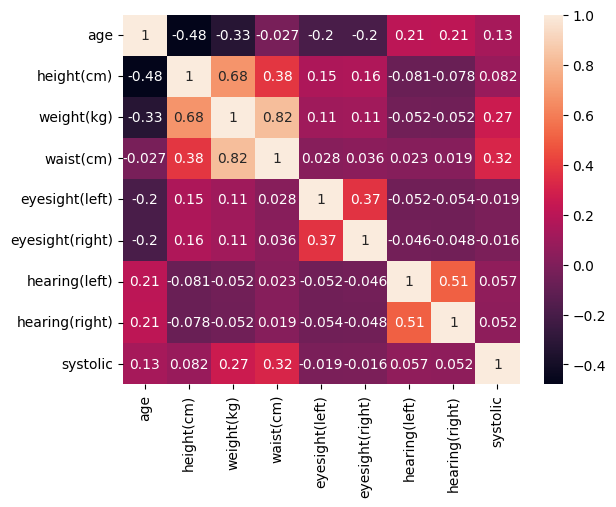

In [17]:
sns.heatmap(df.iloc[:,0:9].corr(), annot=True)
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44552 entries, 0 to 44552
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  44552 non-null  int64  
 1   height(cm)           44552 non-null  int64  
 2   weight(kg)           44552 non-null  int64  
 3   waist(cm)            44552 non-null  float64
 4   eyesight(left)       44552 non-null  float64
 5   eyesight(right)      44552 non-null  float64
 6   hearing(left)        44552 non-null  float64
 7   hearing(right)       44552 non-null  float64
 8   systolic             44552 non-null  float64
 9   relaxation           44552 non-null  float64
 10  fasting blood sugar  44552 non-null  float64
 11  Cholesterol          44552 non-null  float64
 12  triglyceride         44552 non-null  float64
 13  HDL                  44552 non-null  float64
 14  LDL                  44552 non-null  float64
 15  hemoglobin           44552 non-null  floa

**Outlier Checks**

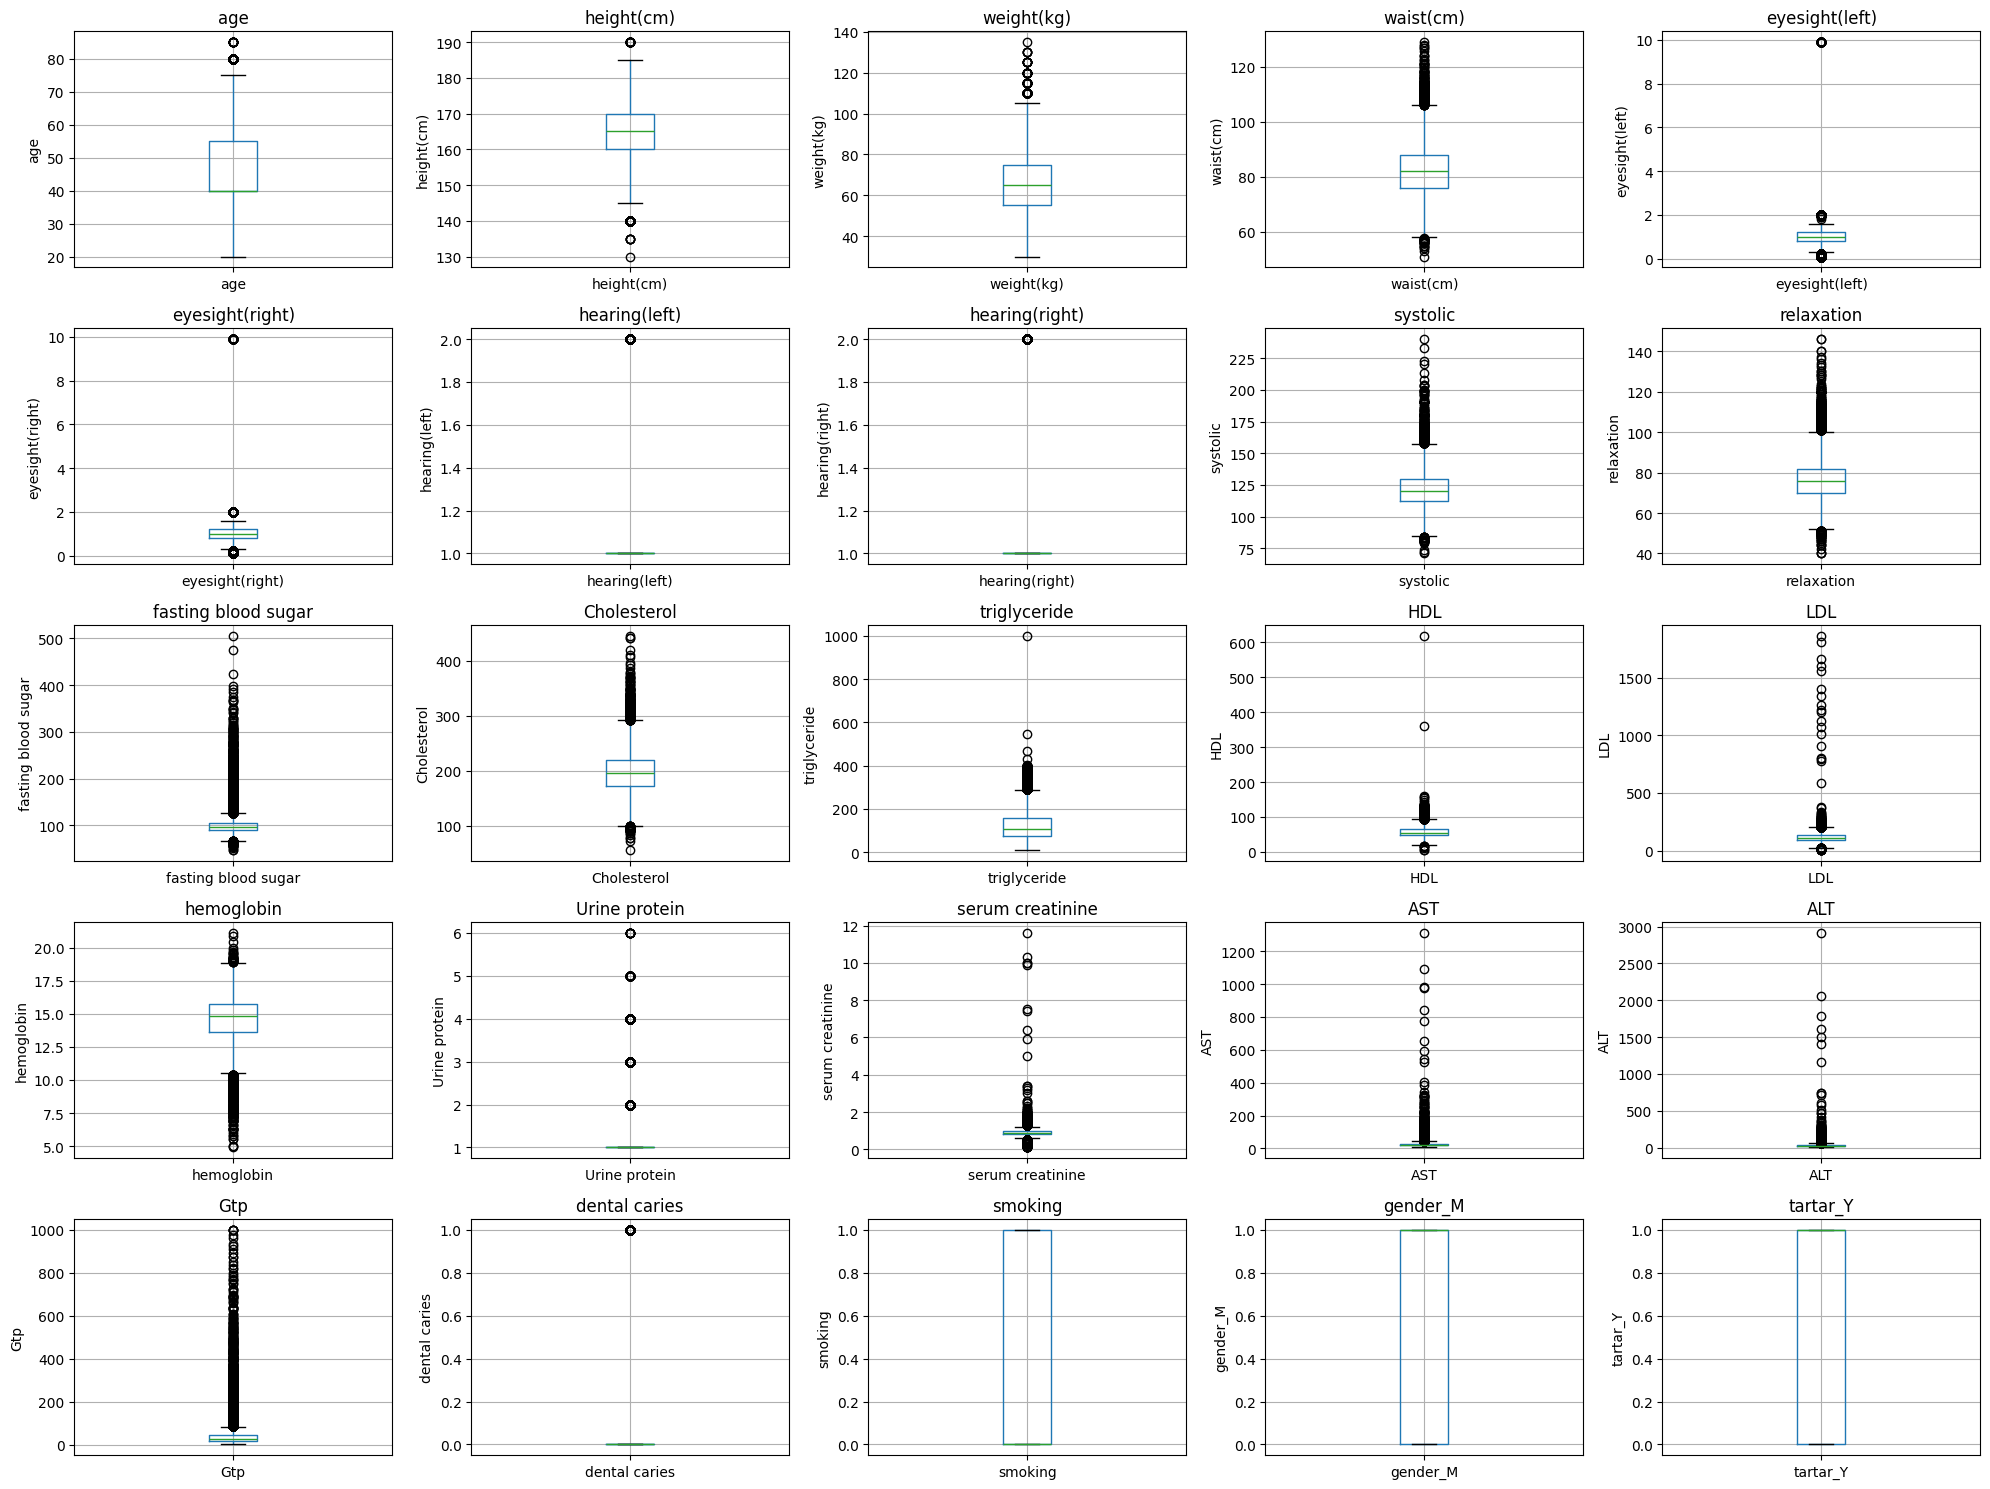

In [19]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20, 15))
numerical_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [20]:
def remove_outlier(col) :
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [21]:
for column in df.columns:
    lr,ur = remove_outlier(df[column])
    df[column] = np.where(df[column] < lr, lr, df[column])
    df[column] = np.where(df[column] > ur, ur, df[column])

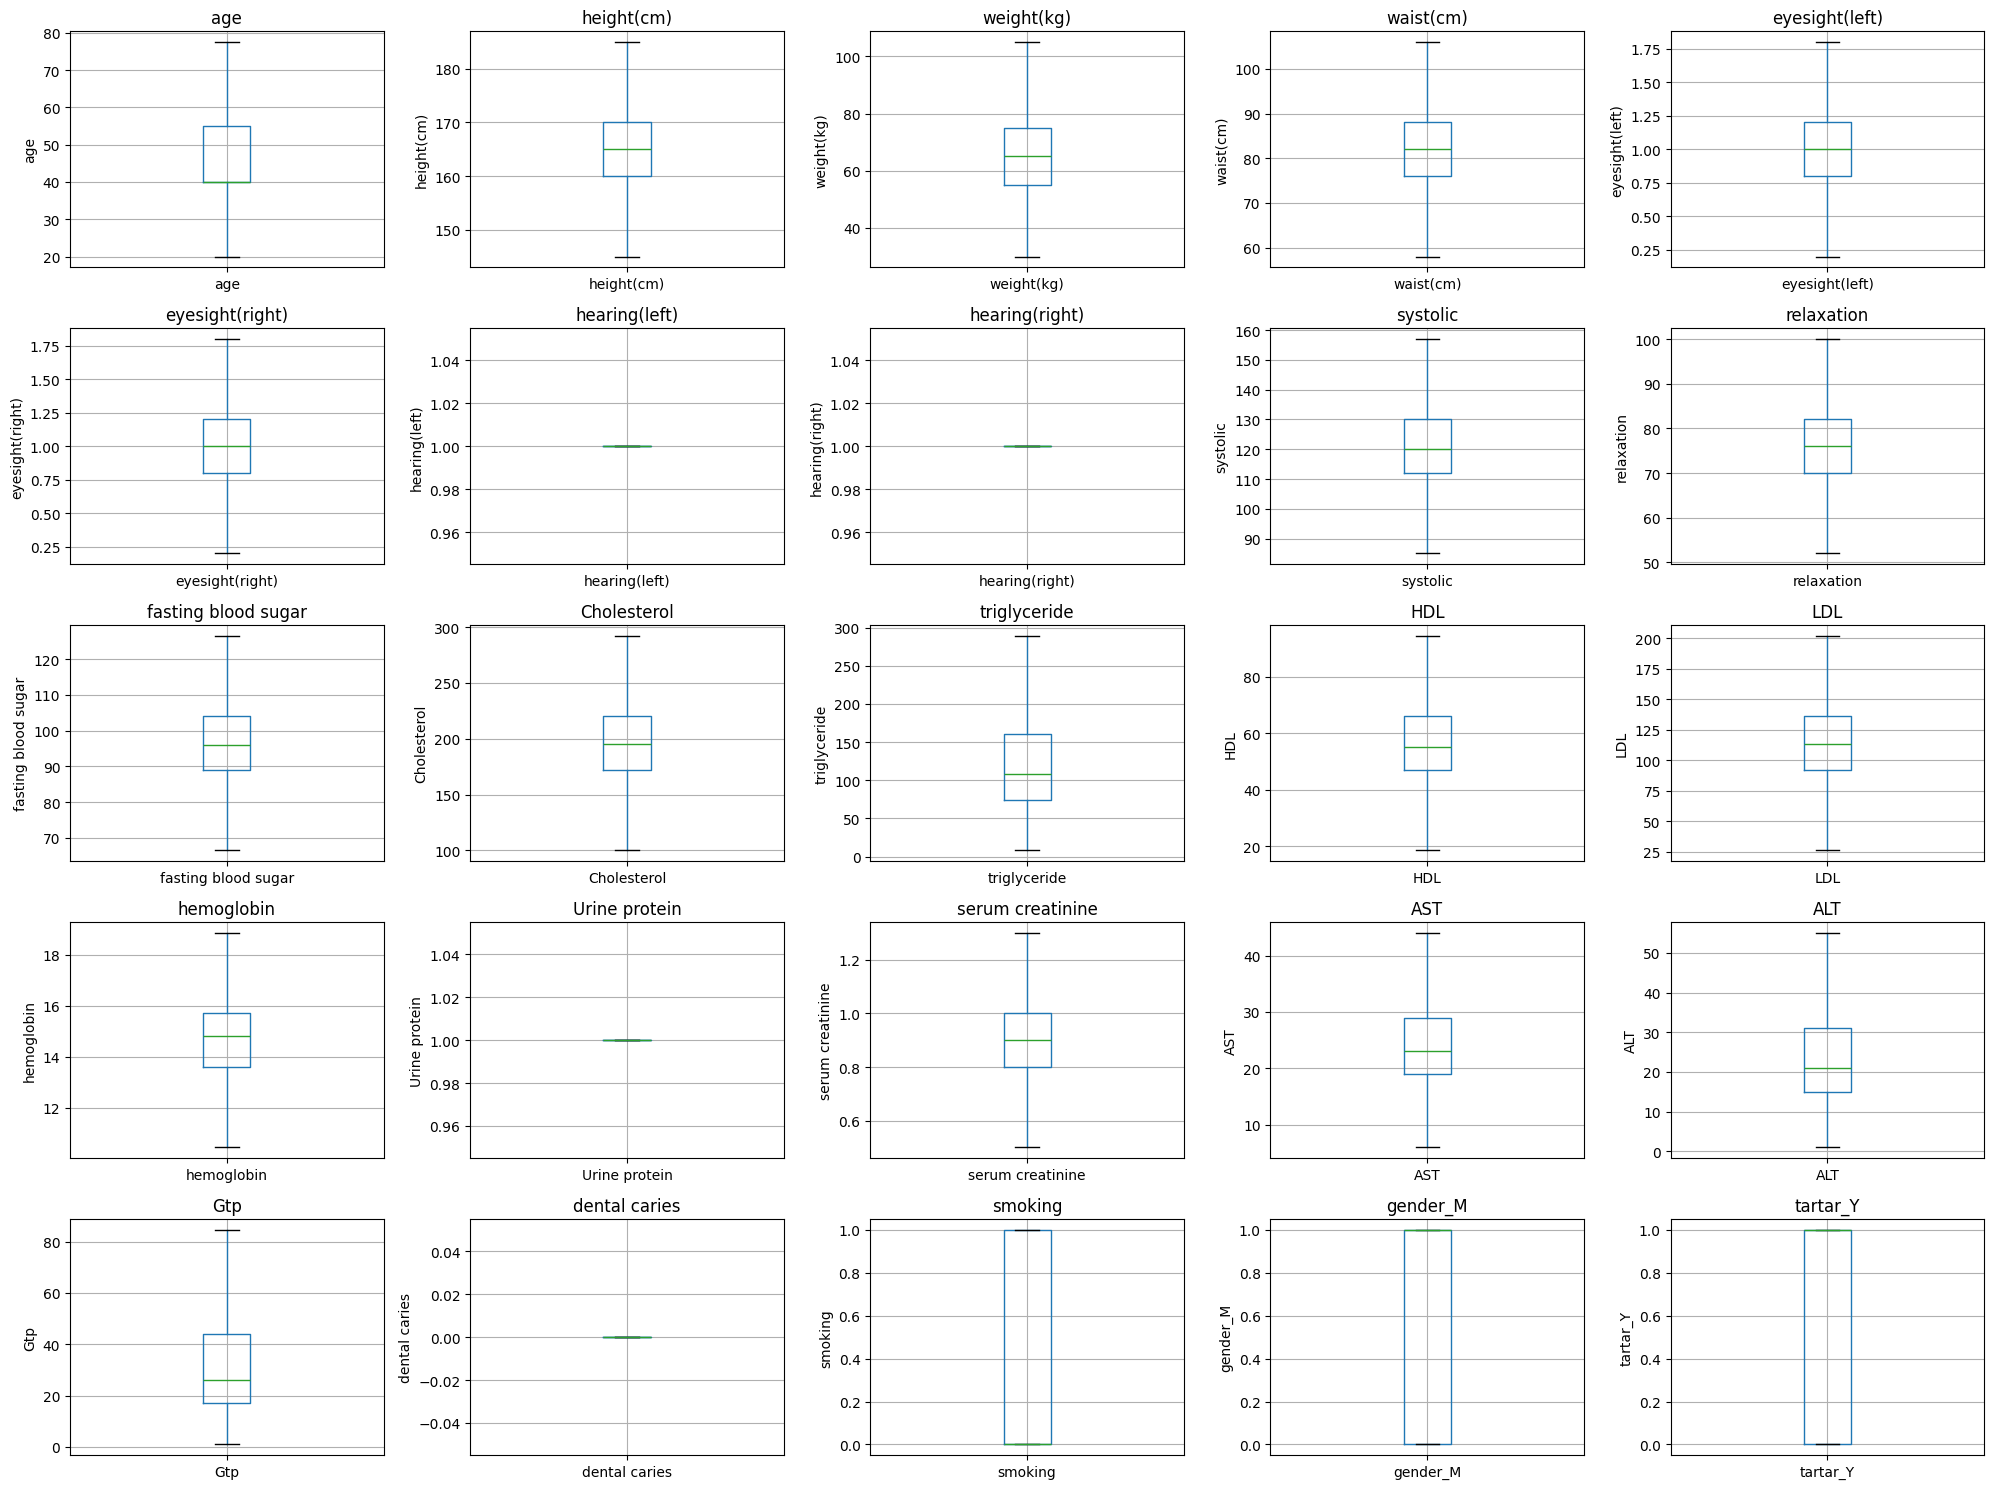

In [22]:
# draw boxplots to visualize outliers

plt.figure(figsize=(20, 15))
numerical_cols = df.select_dtypes(include=np.number).columns

for i, column in enumerate(numerical_cols):
    plt.subplot(5, 5, i + 1)
    df.boxplot(column=column)
    plt.title(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [23]:
df.shape

(44552, 25)

**Data Distribution**

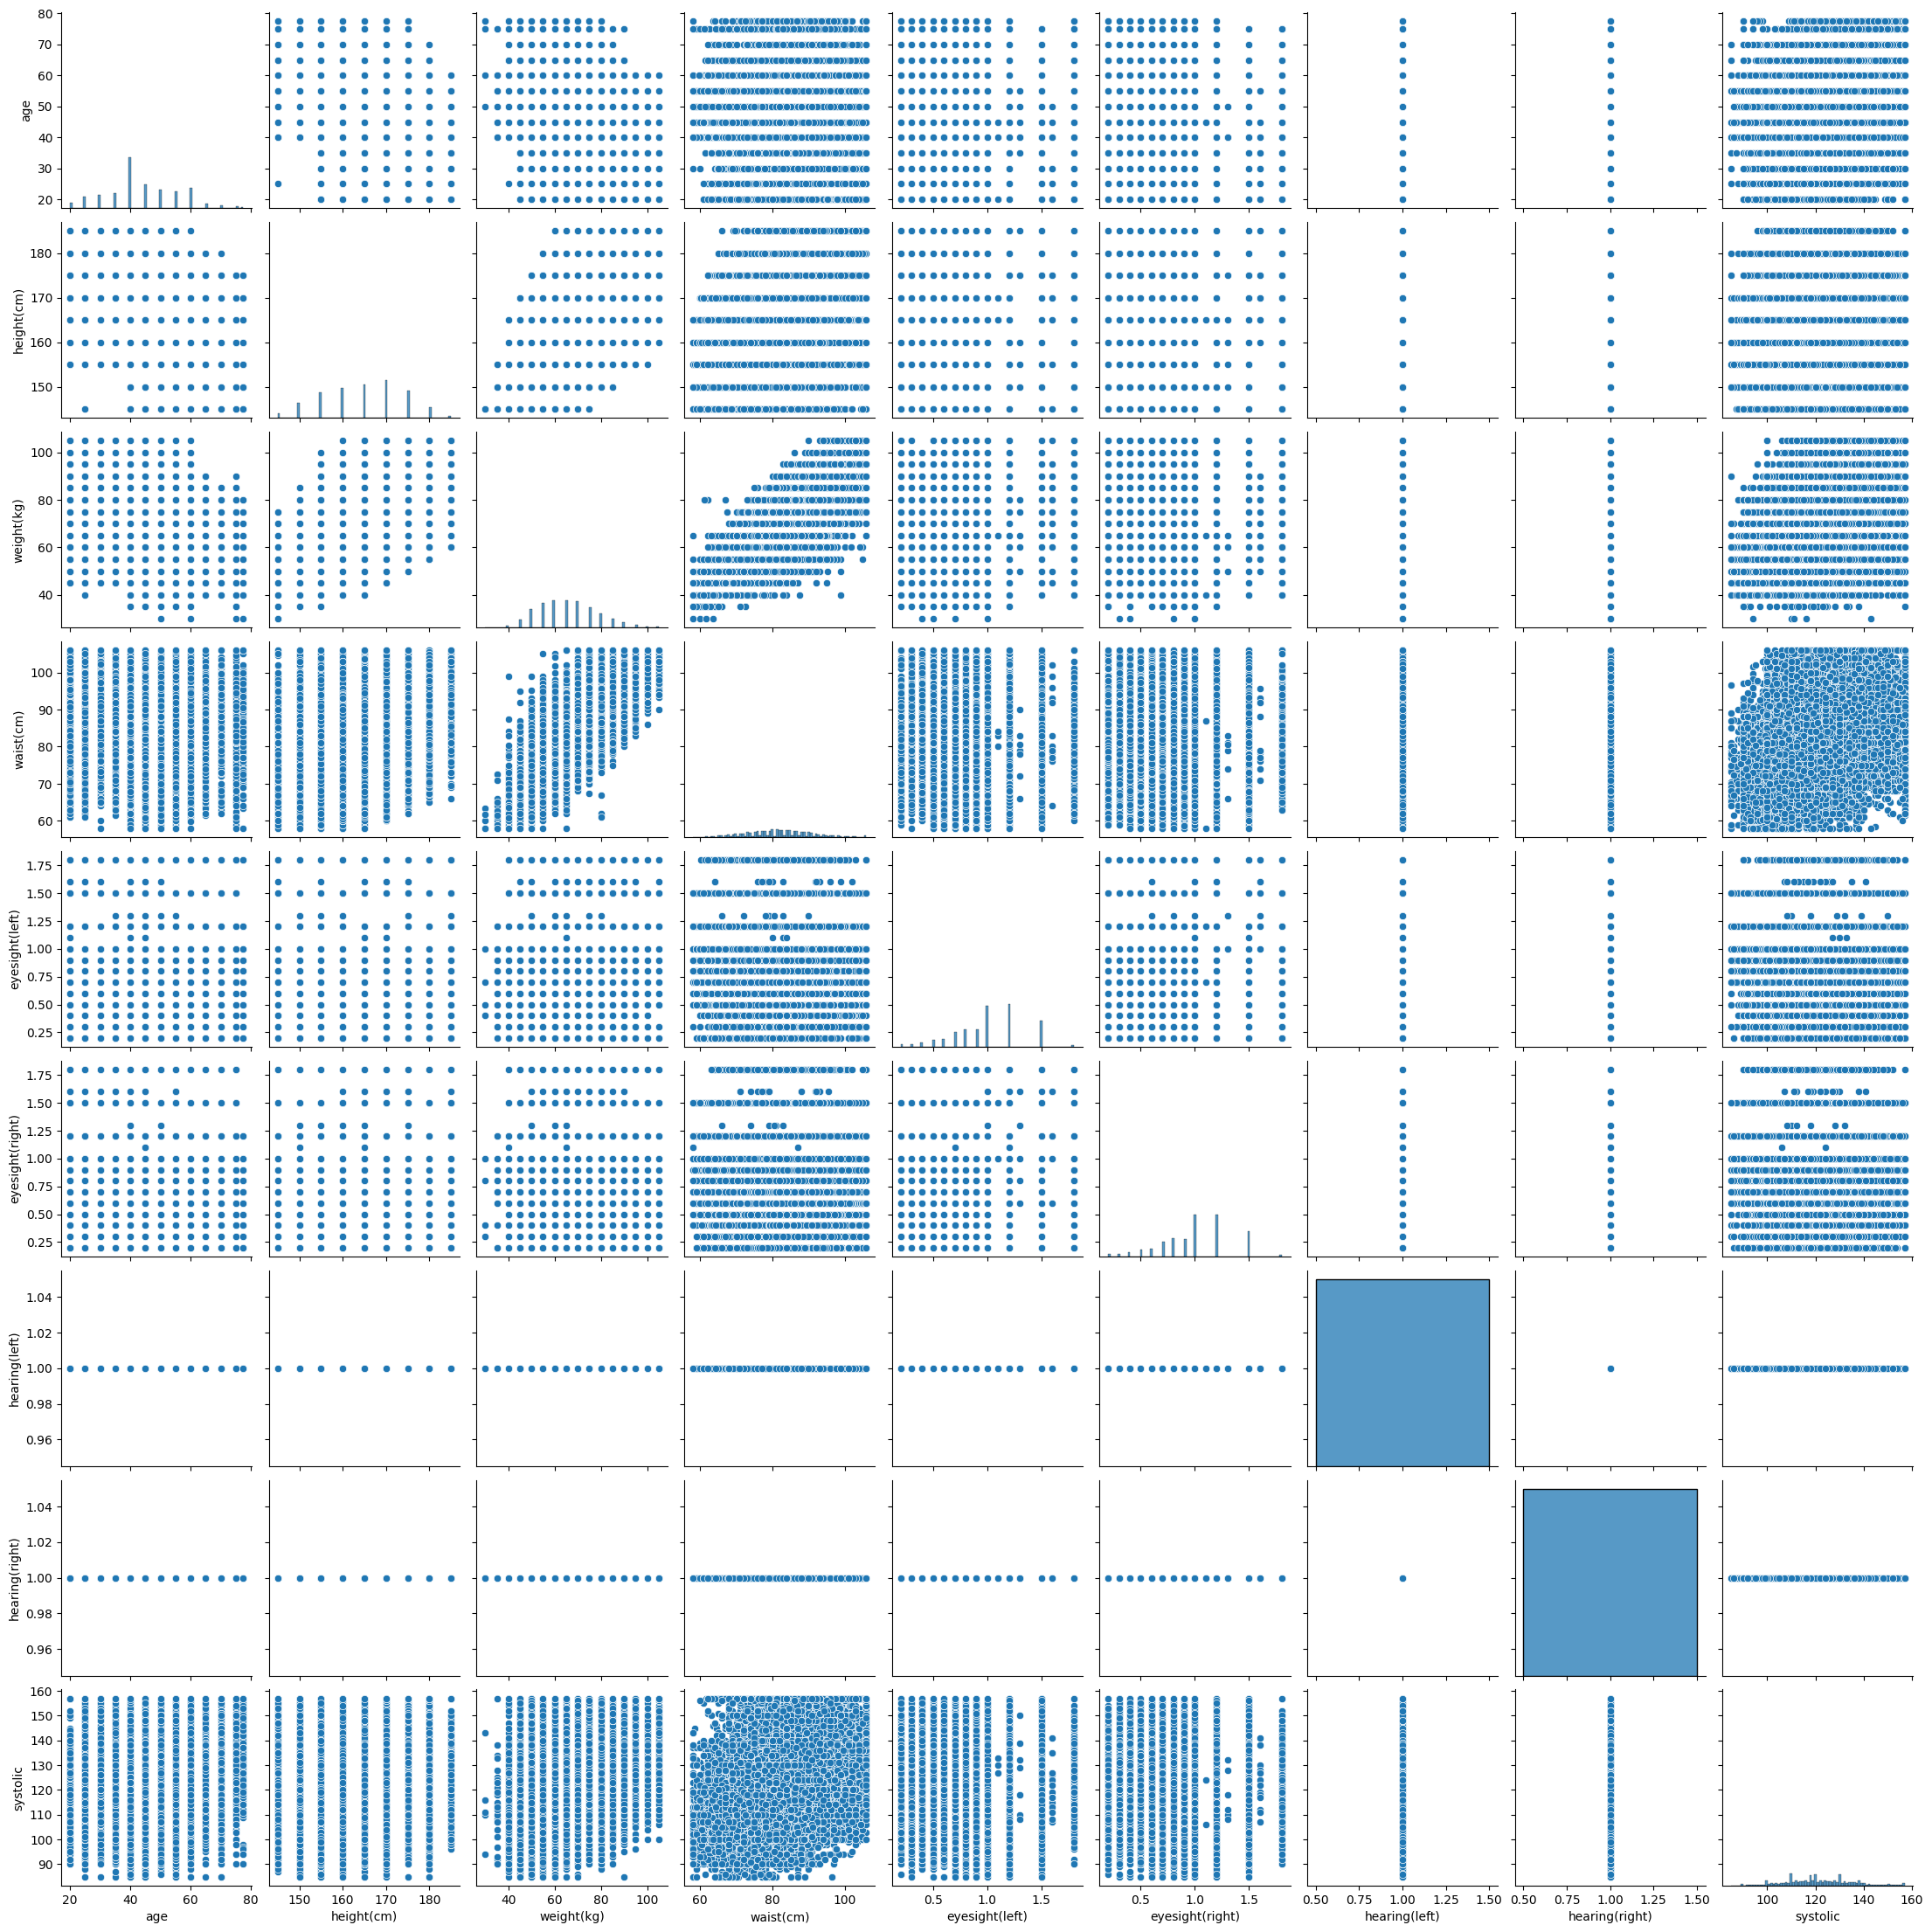

In [24]:
df_attr=(df.iloc[:,0:9])
sns.pairplot(df_attr)
plt.show()

**Train-Test Split**

In [25]:
x=df.drop('smoking',axis=1)
y=df['smoking']

In [26]:
x.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_M,tartar_Y
0,40.0,155.0,60.0,81.3,1.2,1.0,1.0,1.0,114.0,73.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0.0,0.0,1.0
1,40.0,160.0,60.0,81.0,0.8,0.6,1.0,1.0,119.0,70.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0.0,0.0,1.0
2,55.0,170.0,60.0,80.0,0.8,0.8,1.0,1.0,138.0,86.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0.0,1.0,0.0
3,40.0,165.0,70.0,88.0,1.5,1.5,1.0,1.0,100.0,60.0,...,202.0,14.7,1.0,1.0,19.0,26.0,18.0,0.0,1.0,1.0
4,40.0,155.0,60.0,86.0,1.0,1.0,1.0,1.0,120.0,74.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0.0,0.0,0.0


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Logistic Regression Model**

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [29]:
logistic_reg = LogisticRegression(solver='liblinear',max_iter=1000,random_state=0) # Increased max_iter as well
logistic_reg.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [30]:
y_pred_test = logistic_reg.predict(x_test_scaled)

y_pred_test

array([0., 1., 1., ..., 0., 1., 0.])

In [31]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7558


**Compare the train-set and test-set accuracy**

In [32]:
y_pred_train = logistic_reg.predict(x_train_scaled)

y_pred_train

array([1., 1., 0., ..., 0., 0., 1.])

In [33]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Testing-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Training-set accuracy score: 0.7489
Testing-set accuracy score: 0.7558


**Confusion matrix**

In [34]:
cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[4455 1191]
 [ 985 2280]]

True Positives(TP) =  4455

True Negatives(TN) =  2280

False Positives(FP) =  1191

False Negatives(FN) =  985


<Axes: >

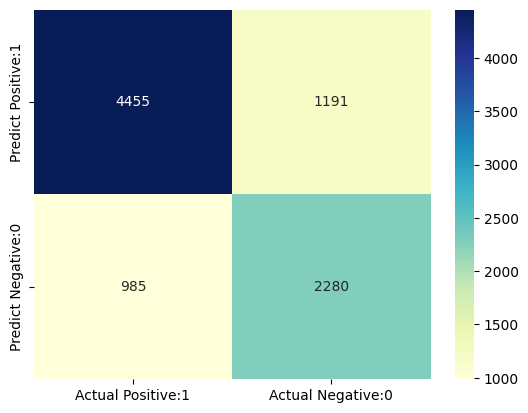

In [35]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

**Classification Report**

In [36]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      5646
         1.0       0.66      0.70      0.68      3265

    accuracy                           0.76      8911
   macro avg       0.74      0.74      0.74      8911
weighted avg       0.76      0.76      0.76      8911



**k-Fold Cross Validation**

In [37]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_reg, x_train_scaled, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.7473699  0.74887767 0.75028058 0.74789562 0.74551066]


In [38]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7480
